<a href="https://colab.research.google.com/github/SrutiGoteti/IIIT-AI-ML-labs-and-projects/blob/main/AIML_Module_1_Lab_2_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [2]:
rng = np.random.default_rng(seed=42)

Load and Prepare the Dataset

In [4]:
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target.astype(int)

Random Classifier fuction

In [24]:
def RandomClassifier(trainlabel, size):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=size)
    predlabel = classes[rints]
    return predlabel

Split function

In [25]:
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

This is a super important step because it ensures your model gets diverse and unbiased samples during splitting.

In [26]:
X, y = shuffle(X, y, random_state=42)

In [27]:
testX, testY, trainX, trainY = split(X, y, 0.25)

 Experiment: Vary Validation Set Percentage

In [28]:
val_percentages = [0.01, 0.05, 0.1, 0.25, 0.5, 0.9, 0.99]
nn1_accuracies = []
rand_accuracies = []

In [29]:
for val_percent in val_percentages:
    valX, valY, subTrainX, subTrainY = split(trainX, trainY, val_percent)

     # 1-Nearest Neighbor
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(subTrainX, subTrainY)
    valPred1 = knn1.predict(valX)
    acc1 = accuracy_score(valY, valPred1)
    nn1_accuracies.append(acc1)

    # Random Classifier
    randPred = RandomClassifier(subTrainY, len(valY))
    accRand = accuracy_score(valY, randPred)
    rand_accuracies.append(accRand)

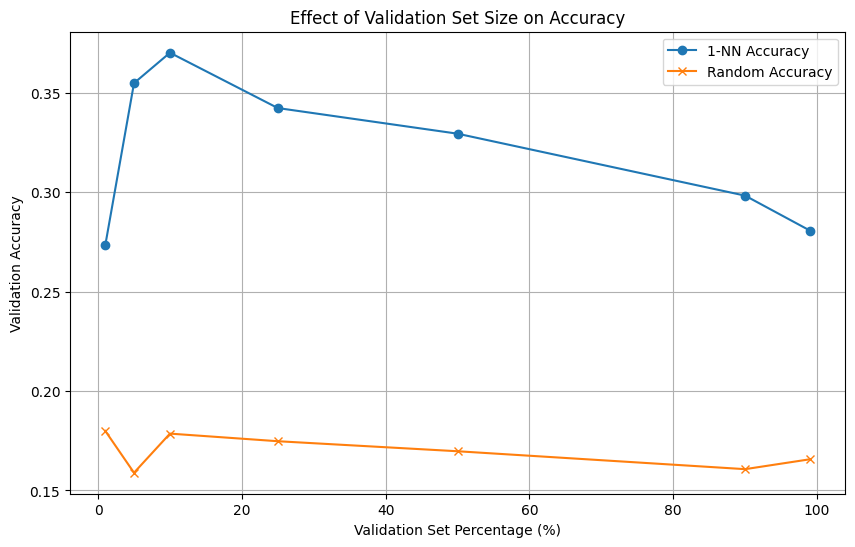

In [30]:
plt.figure(figsize=(10,6))
plt.plot([v*100 for v in val_percentages], nn1_accuracies, label='1-NN Accuracy', marker='o')
plt.plot([v*100 for v in val_percentages], rand_accuracies, label='Random Accuracy', marker='x')
plt.xlabel('Validation Set Percentage (%)')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Set Size on Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(trainX, trainY)
testPred1 = knn1.predict(testX)
testAcc1 = accuracy_score(testY, testPred1)

In [32]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(trainX, trainY)
testPred3 = knn3.predict(testX)
testAcc3 = accuracy_score(testY, testPred3)

In [33]:
print("1-NN Test Accuracy:", round(testAcc1*100, 2), "%")
print("3-NN Test Accuracy:", round(testAcc3*100, 2), "%")

1-NN Test Accuracy: 35.65 %
3-NN Test Accuracy: 34.68 %


# 1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

According to the plot above, it is pretty evident and logically sensible to say that:

Initially, as the validation set percentage increases, the accuracy also increases at a greater rate (more number of samples -> better estimates)

But, as it increases further, we observe that the accuracy slowly decreases. This is because, the training data is becoming smaller and smaller and hence becomes more and more underfitting.


# 2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

This question can again be answered through the plot above as well.

In brief, we can say that:

If validation is too small → noisy estimate

If training is too small → model performs poorly

Need a balance (10-25% validation)

# 3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Usually 10%-25% is good in most real-world tasks

# 4. Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, absolutely.

One split (e.g., 80-20 train-test) may randomly favor or hurt the model.

Multiple random splits + averaging gives a more stable and reliable estimate.

# 5. Does it give more accurate estimate of test accuracy?

Yes, on average.

When you average over multiple validation accuracies, you are approximating the "true" generalization ability of your model.

It's especially helpful when the validation accuracy matches or closely follows the test accuracy trend.

# 6. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Yes.

More iterations leads to better estimate

Fewer iterations can result in noisy or unstable estimates

More iteration help to cancel out randomness due to different splits.

We can think of it like taking more samples to calculate an average — the more you take, the closer your average is to the truth.

# 7. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

 To an extent, yes

 But we need to take caution because,

Tiny training sets → model is underfit.

Tiny validation sets → performance estimate is unreliable.

So increasing iterations helps, but there is a limit.
You still need sufficient data in each split to train and validate meaningfully.

In [36]:
iterations = 10
val_split = 0.2

accuracies_1NN = []
accuracies_3NN = []


In [37]:
for i in range(iterations):
    valX, valY, subTrainX, subTrainY = split(trainX, trainY, val_split)

    # 1-NN
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(subTrainX, subTrainY)
    pred1 = knn1.predict(valX)
    acc1 = accuracy_score(valY, pred1)
    accuracies_1NN.append(acc1 * 100)

    # 3-NN
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(subTrainX, subTrainY)
    pred3 = knn3.predict(valX)
    acc3 = accuracy_score(valY, pred3)
    accuracies_3NN.append(acc3 * 100)

Plot: Accuracy across multiple random splits

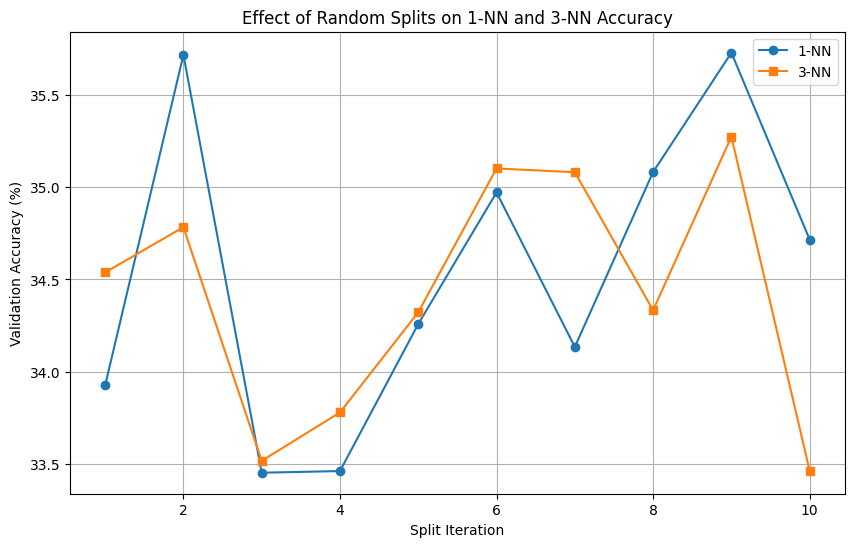

Average Validation Accuracy (1-NN): 34.55 %
Average Validation Accuracy (3-NN): 34.42 %


In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1, iterations + 1), accuracies_1NN, label='1-NN', marker='o')
plt.plot(range(1, iterations + 1), accuracies_3NN, label='3-NN', marker='s')
plt.xlabel("Split Iteration")
plt.ylabel("Validation Accuracy (%)")
plt.title("Effect of Random Splits on 1-NN and 3-NN Accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("Average Validation Accuracy (1-NN):", round(np.mean(accuracies_1NN), 2), "%")
print("Average Validation Accuracy (3-NN):", round(np.mean(accuracies_3NN), 2), "%")


Comparison: 1-NN vs 3-NN

If the 3-NN line is generally above the 1-NN line, it means 3-NN is more accurate on average.

3-NN is often less prone to overfitting than 1-NN because it smooths out noise by considering multiple neighbors.

If the lines (especially for 3-NN) are relatively flat, it means the model is stable and its performance doesn’t fluctuate wildly with different validation sets.

If the 1-NN accuracy fluctuates a lot, it suggests that 1-NN is more sensitive to small changes in the training/validation split, which often happens with simpler models.